In [1]:
import pandas as pd
import numpy as np
from scipy import stats
# Causes plots to display within the notebook rather than in a new window
%pylab inline
import matplotlib.pyplot as plt
pd.options.display.max_rows = 6
dataFrame = pd.read_csv('./stroopdata.csv')
dataFrame['Difference'] = dataFrame['Incongruent'] - dataFrame['Congruent']

Populating the interactive namespace from numpy and matplotlib


### 1. What is our independent variable? What is our dependent variable?

The **independent variable** is the congruency (either congruent or incongruent) of the color of the ink of a word and the color the word spells out. That is, if the word 'Red' is spelled in red ink, the color and the spelling are congruent. If the word 'Green' is spelled in red ink, the color and the spelling are incongruent.

The **dependent variable** is the amount of time in seconds it takes a participant to read through a list of words and name the color of the ink for each word.

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

The **null hypotheses** for this task is that it will take equal or less time in seconds to read a list of words when the ink color and word spelling are incongruent than when they are congruent.

$H_0: \mu_{congruent} \ge \mu_{incongruent}$

The **alternative hypotheses** for this task is that it will take more time in seconds to read a list of words when the ink color and word spelling are incongruent than when they are congruent.

$H_A: \mu_{congruent} \lt \mu_{incongruent}$

Note: $\mu_{congruent}$ and $\mu_{incongruent}$ refer to the congruent and incongruent population means, respectively.

**Justification:** This hypotheses is based off the idea that parsing semantics from words is a nearly automated process and when the semantics of the word do not match the ink color of the word it will interfere with and increase the time is takes to identify the ink color. $\mu$ here refers to the population means.

To **test this hypotheses** a one-tailed within-subject paired-sample dependent t-test will be used with a criterion level of $\alpha = 0.05$ required to reject $H_0$.

**Justification:** The test was chosen to be one-sided because our alternate hypotheses specifies that there will be a increase, not just an inequality, in the amount of time needed to read incongruent list. The test was chosen to be a dependent paired-sample test because our data has within-subject paired observations on how each subject preformed on each test. The test is a t-test because we are working with sample data without population parameters. There were no specific reasons to use a non-standard alpha criterion, so an accepted common level was chosen.

### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [2]:
print "Mean (seconds):"
print dataFrame.mean().to_string()
print "\n"
print "Median (seconds):"
print dataFrame.median().to_string()
print "\n"
print "Variance (unbiased, seconds^2):"
print dataFrame.var().to_string()
print "\n"
print "Sample Standard Deviation (unbiased, seconds):"
print dataFrame.std().to_string()

Mean (seconds):
Congruent      14.051125
Incongruent    22.015917
Difference      7.964792


Median (seconds):
Congruent      14.3565
Incongruent    21.0175
Difference      7.6665


Variance (unbiased, seconds^2):
Congruent      12.669029
Incongruent    23.011757
Difference     23.666541


Sample Standard Deviation (unbiased, seconds):
Congruent      3.559358
Incongruent    4.797057
Difference     4.864827


### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

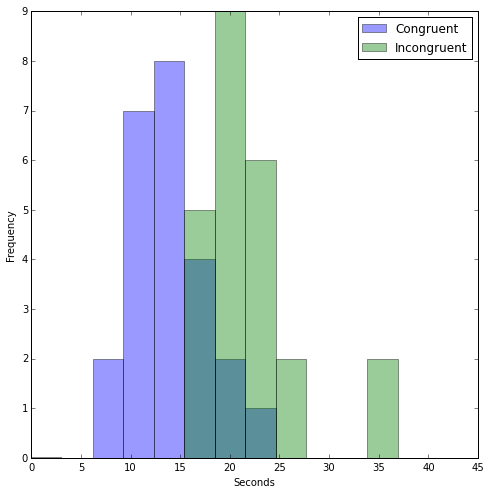

In [3]:
plt.figure()
dataFrame.loc[:, ['Congruent', 'Incongruent']].plot(kind='hist', alpha=0.4, bins=13, range=[0,40], figsize=(8,8))
plt.xlabel('Seconds')
plt.ylabel('Frequency')
plt.show()

The graph above shows a histogram for the congruent and incongruent samples. You can see the data for both sets is roughly normally distributed, and seems to match the standard deviation and mean calculated from Question 3. You can also see the mean for the incongruent sample is between 5 and 10 seconds greater than the congruent sample, which matches the sample difference data from Question 3.

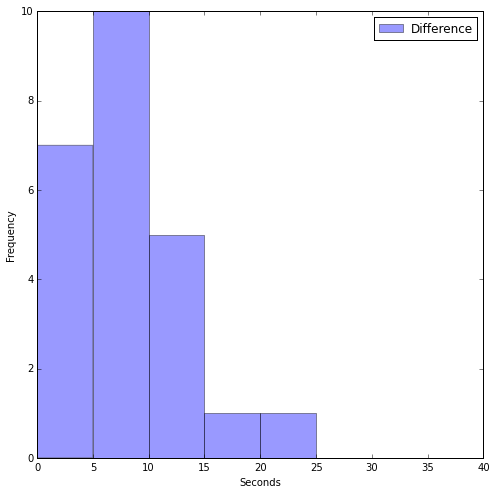

In [4]:
plt.figure()
dataFrame.loc[:, ['Difference']].plot(kind='hist', alpha=0.4, bins=8, range=[0,40], figsize=(8,8))
plt.xlabel('Seconds')
plt.ylabel('Frequency')
plt.show()

The graph above shows a histogram for the within-subject pair-matched difference between the incongruent and congruent samples. You can see the data is roughly normally distributed and and the mean and standard deviation match the calculation from Question 3.

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

Note: Since this is a paired-sample dependent t-test, only the difference of the paired samples is used in the analysis.

In [5]:
# Sample size
n = len(dataFrame.index)

# Degrees of freedom
df = n - 1

# Alpha level criterion
alpha = 0.05

# Mean of paired-sample differences
x_bar = dataFrame["Difference"].mean()

# Unbiased standard deviation of paired-sample differences
s = dataFrame["Difference"].std()

# Standard Error
SE = s / sqrt(n)

# t statistic
t_stat = x_bar / SE; t_stat

# t critical values
t_crit = stats.t.ppf(0.95, df)

# p value
p = 1 - stats.t.cdf(t_stat, df);

With the t-statistic of 8.021 exceeding our t-critical value of 1.714 (set from an $\alpha$ level criterion of 0.05), we can reject the null hypotheses $H_0$. Further more, since this was an experimental test design and not an observational study, we can make causal statements and conclude that the incongruent spelling had a causal effect (an increase) on the time it took to complete the list reading task.

Our $\alpha$ level of 0.05 set a minimum confidence level of 95%, which our p-value of 2.051e-08 surpassed with a confidence level of over 99.999%.

### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

The hypotheses is based off the idea that parsing semantics from words is a nearly automated process and when the semantics of the word do not match the ink color of the word it will interfere with and increase the time is takes to identify the ink color$^{[1]}$.

An alternative task that would result in a similar interference effect could be using the words 'small', 'medium', and 'large' presented in a small, medium, and large font size. The subject would then be timed reading through two lists, a congruent list where the font size and the word match, and in incongruent list, where the font size and the word do not match.

#### Sources:
[1] Stroop, John Ridley (1935). "Studies of interference in serial verbal reactions". Journal of Experimental Psychology 18 (6): 643–662. doi:10.1037/h0054651. Retrieved 2008-10-08.